#Overview of GMM and K-means



#GMM

-Gaussian Mixture Models are a powerful clustering algorithm

-Gaussian Mixture Models is improvement of k means

-it uses a probabilistic assignment of data points to cluster

-it can discover complex pattern and grou them into cohesive,homogenous components that are clode representatins ofrealpattern with the dataset.

-it has higher computation time than k-means

#k-means
-is a simple and fast clustering method but it may not truly capture heterogeneity in cloud workload

k - means is widely used in scientific and industrial applications due to its simplicity and speed

k - means uses squared Euclidean distance as the similarity measures for cluster membership

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import mixture
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

#generating data

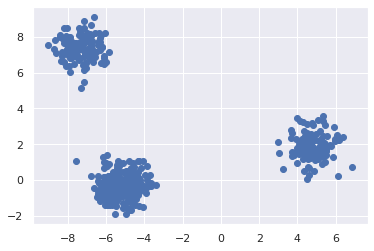

In [3]:
X, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std=0.67)
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

-In the graphic above we can see with the eye that there are probably 3 clusters

# calculating the k-Means with 4 clusters

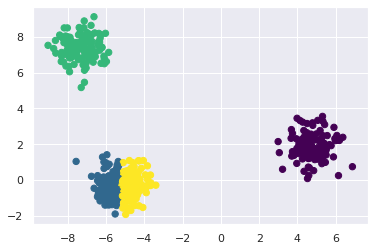

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

observations

-we can see that the k-means was able to identify four clusters from our data

#visualising radii
-this algorithm only includes the points within its calculated radius in a cluster

-now we have seen that k means was ablero determine four cluster so is very important to initiate those clusters 

In [11]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

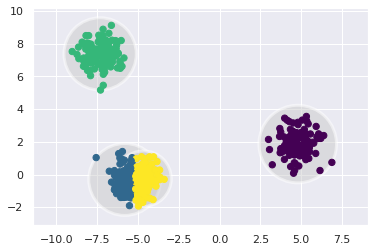

In [12]:
kmeans = KMeans(n_clusters=4)
plot_kmeans(kmeans, X)

observations

-we can see that some cluster overlap and from the studies clusters of k means dont have to overlap but at this stage they have overlap the reason behind overlapping might be outliers within the clusters

#Gaussian Mixture Models

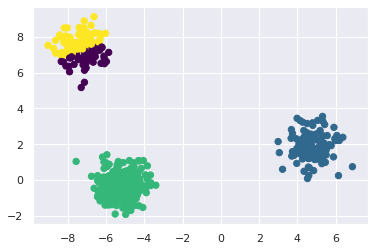

In [14]:
gmm_model = mixture.GaussianMixture(n_components=4)
gmm_model.fit(X)
labels = gmm_model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [16]:
probs = gmm_model.predict_proba(X)
probs

array([[3.02417587e-001, 8.29690943e-089, 2.18381881e-034,
        6.97582413e-001],
       [1.25732455e-102, 1.00000000e+000, 2.68800468e-046,
        2.85595757e-143],
       [9.14325321e-042, 1.00381655e-044, 1.00000000e+000,
        4.73593131e-068],
       ...,
       [1.25744444e-041, 2.77431693e-061, 1.00000000e+000,
        4.60193874e-066],
       [1.06444704e-087, 1.00000000e+000, 7.82832972e-041,
        2.82506111e-122],
       [1.23833456e-044, 1.57306467e-050, 1.00000000e+000,
        9.32043297e-072]])

#effect of probalities 

-we know that GMM uses probabilies to cluster data points so
lets see the effect

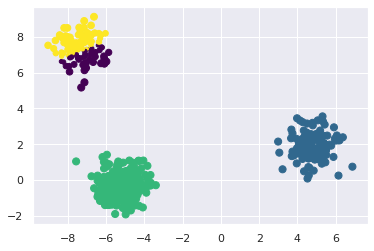

In [17]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

observations

now we can see that those two clusters dont see to like overlap like using k-means

In [18]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


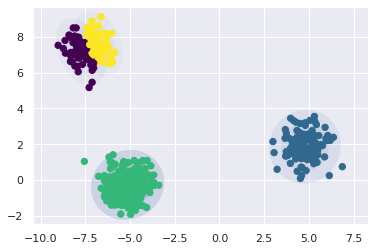

In [19]:
gmm = mixture.GaussianMixture(n_components=4)
plot_gmm(gmm, X)

#*AIC AND BIC PLOT*

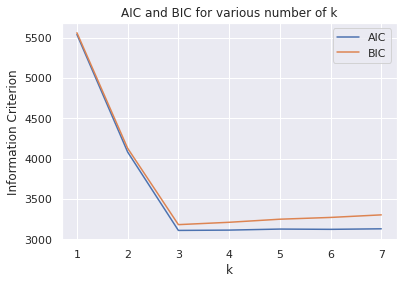

In [23]:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = mixture.GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC for various number of k", fontsize=12)
plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc='upper right')
plt.show()

AIC and BIC have the minimum of 3(k=3) 